# A3 BIG DATA

## Premissa

Fomos contratados por uma empresa varejista de roupas para alavancar suas vendas. Ela nos ofereceu o seu registro de vendas, disponível em formato CSV e nos solicitou em retorno a criação de uma estratégia de marketing e um mapeamento mais específico de seu público alvo (persona) atualmente

## Objetivos da estratégia de marketing:

- Satisfação do cliente
- Quantidade de produtos vendidos em cada marca
- Lucro líquido (com desconto aplicado)
- Encontar carro chefe de vendas
- Encontrar temporada preferida do publico alvo
- Encontrar gênero que é mais atendido
- Encontar material mais vendido

marcas_populares = [
    "Adidas",
    "Lupo",
    "Mizuno",
    "Mormaii",
    "Fila",
    "Zorba",
    "Menina Linda",
    "MultiMarcas",
    "Stillger Jeans",
    "Mash",
    "Keeper",
    "Almix",
    "Imperio Kids",
    "AMANDIKA KIDS",
    "Levi's",
    "Slim Fitness",
    "New Era",
    "Paraíso da Lingerie",
    "Importado",
    "Genérica",
    "Olympikus",
    "Puma",
    "Under Armour"
]:

## Instalar depdendências

In [1]:
# Instalar dependências
get_ipython().system_raw('pip install pandas')
get_ipython().system_raw('pip install findspark')
get_ipython().system_raw('pip install matplotlib')
get_ipython().system_raw('pip install squarify')
get_ipython().system_raw('pip install loguru')

/home/thiago/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2607: UserWarning: You executed the system command !pip which may not work as expected. Try the IPython magic %pip instead.
  warnings.warn(


# Configurações iniciais - tratar xlsx para criar um .csv

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.1.2-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
from loguru import logger

spark = SparkSession.builder.appName(
    'A3 Análise de dados e Big Data').getOrCreate()

roupas = spark.read.csv(path='./data/clothes_db.csv', sep=',')
roupas = roupas.fillna("Sem avaliação")
logger.info("Configuração pronta!")

23/10/10 01:38:44 WARN Utils: Your hostname, W10-tks resolves to a loopback address: 127.0.1.1; using 172.25.91.212 instead (on interface eth0)
23/10/10 01:38:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/10/10 01:38:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2023-10-10 01:39:05.195 | INFO     | __main__:<module>:15 - Configuração pronta!


## Tratamento de dados - renomear colunas

In [3]:
roupasColNames = [
    'titulo', 
    'preco_original', 
    'desconto_percentual', 
    'preco_com_desconto', 
    'quantidade_vendida', 
    'marca', 
    'material',
    'genero',
    'temporada',
    'nota_satisfacao',
    'quantidade_avals'
]
for index, colname in enumerate(roupasColNames):
    roupas = roupas.withColumnRenamed(f"_c{index}", colname)
roupas.printSchema()
roupas.select("*").where(roupas.quantidade_vendida >= 1000).show(999999)

root
 |-- titulo: string (nullable = false)
 |-- preco_original: string (nullable = false)
 |-- desconto_percentual: string (nullable = false)
 |-- preco_com_desconto: string (nullable = false)
 |-- quantidade_vendida: string (nullable = false)
 |-- marca: string (nullable = false)
 |-- material: string (nullable = false)
 |-- genero: string (nullable = false)
 |-- temporada: string (nullable = false)
 |-- nota_satisfacao: string (nullable = false)
 |-- quantidade_avals: string (nullable = false)



+--------------------+--------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+---------------+----------------+
|              titulo|preco_original|desconto_percentual|preco_com_desconto|quantidade_vendida|               marca|            material|             genero|           temporada|nota_satisfacao|quantidade_avals|
+--------------------+--------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+---------------+----------------+
|Pijama Cirurgico ...|      R$ 69.90|                 0%|          R$ 69.90|              1000|TORONTO UNIFORMES...|           Poliéster|         Sem gênero|                 N/A|              4|             273|
|Kit 10 Cuecas Box...|     R$ 274.81|                18%|         R$ 232.89|             10000|                Lupo|             Algodão|          Mascu

In [42]:
import pyspark.sql
from pyspark.sql.functions import col

def pega_vendas_da_marca(company_name:str) -> pyspark.sql.dataframe.DataFrame :
    return roupas.select("*").where(col("marca").contains(company_name))

def salvar_csv_marcas_populares(path:str) -> None:
    (dados_marcas_populares.toPandas()).to_csv(path)
    
path = "./data/db_tratado.csv"

marcas_populares = [
    "adidas",
    "Lupo",
    "Mizuno",
    "Mormaii",
    "Fila",
    "Zorba",
    "Menina Linda",
    "MultiMarcas",
    "Stillger Jeans",
    "Mash",
    "Keeper",
    "Almix",
    "Imperio Kids",
    "AMANDIKA KIDS",
    "Levi's",
    "Slim Fitness",
    "New Era",
    "Paraíso da Lingerie",
    "Importado",
    "Genérica",
    "Olympikus",
    "Puma",
    "Under Armour"
]


vendas_marcas_populares = {
    marca: pega_vendas_da_marca(marca) for marca in marcas_populares
}
dados_marcas_populares = vendas_marcas_populares["adidas"]

for marca in marcas_populares[1:]:
    dados_marcas_populares  = dados_marcas_populares.union(vendas_marcas_populares[marca])
    
salvar_csv_marcas_populares(path)
logger.info(f"CSV salvo em {path}")

2023-10-10 01:58:15.783 | INFO     | __main__:<module>:48 - CSV salvo em ./data/db_tratado.csv


# Gráfico de comparação de quantidade vendida

2023-10-10 03:52:30.086 | DEBUG    | __main__:<module>:27 - Valores_y - grafico qtd/marca: [1160.0, 292032.0, 4.0, 10.0, 5.0, 288335.0, 8643.0, 53925.0, 20105.0, 75583.0, 40909.0, 81000.0, 34685.0, 60000.0, 2661.0, 2000.0, 1.0, 7205.0, 3507.0, 43590.0, 130.0, 1008.0, 8.0]


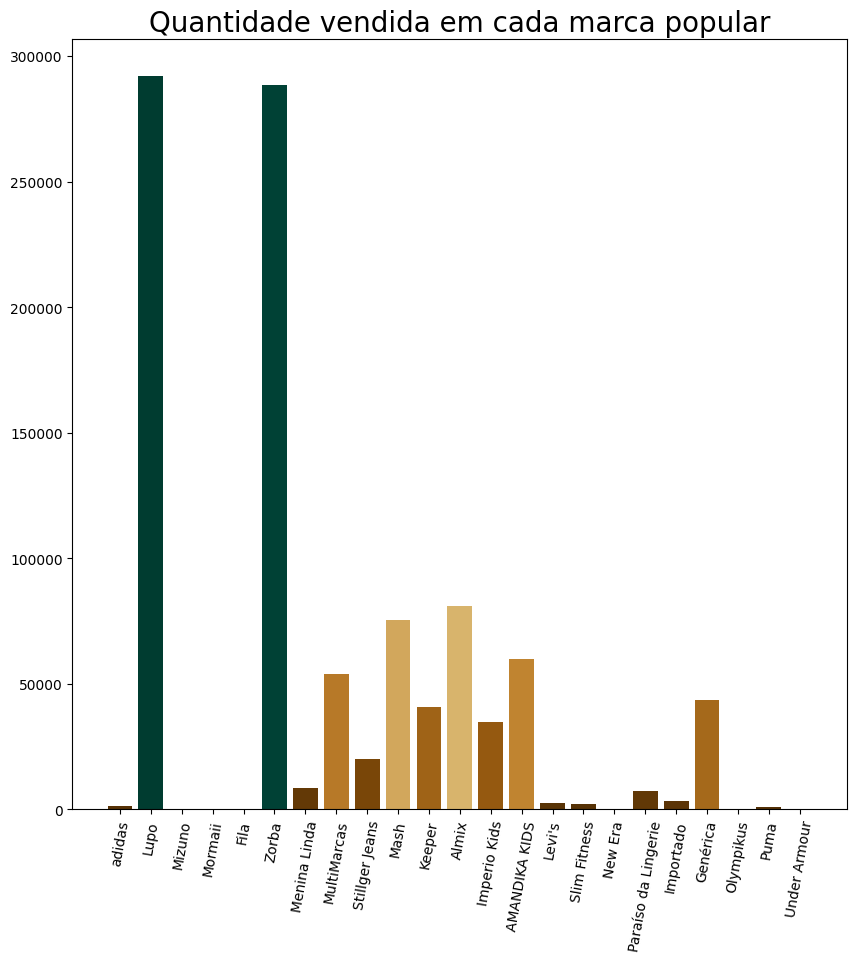

In [142]:
import matplotlib
from matplotlib import pyplot as plt

def soma_qtd_vendida(marca:str) -> float:
    return sum([
        float(row[0]) for row in
        vendas_marcas_populares[marca].select("quantidade_vendida").collect()
    ])

def monta_grafico_barra(x,y, color, titulo:str) -> None:
    plt.figure(figsize=(10,10))
    plt.title(titulo, fontsize=20)
    plt.bar(x,y, color = color)
    plt.xticks(rotation=80)
    plt.show()
    

def monta_lista_cores(cmap):
    mini = min(somas_vendas)
    maxi = max(somas_vendas)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    return [cmap(norm(i)) for i in somas_vendas]

somas_vendas = [
    soma_qtd_vendida(marca) for marca in vendas_marcas_populares
]
logger.debug("Valores_y - grafico qtd/marca: " + str(somas_vendas))

cmap = matplotlib.cm.BrBG
colors = monta_lista_cores(cmap)

monta_grafico_barra(marcas_populares, somas_vendas, colors, "Quantidade vendida em cada marca popular")


# Comparação de lucros feitos por cada marca

Pra fazer esse gráfico, o tamanho dos retânglos precisam ser porcentagens com relação ao preço máximodo dataset
pra ter uma lista de lucros, eu preciso multiplicar o valor com desconto com a quantidade, dai somar esses valores de cada marca

2023-10-10 03:50:24.298 | DEBUG    | __main__:<module>:17 - lista_vendas: [207037.9, 33844741.46, 489.96, 510.95, 767.68, 54380476.75, 1010643.81, 9592976.24, 1190971.4, 15574980.4, 2017177.24, 12476300.0, 4892919.95, 8394000.0, 854481.87, 86000.0, 339.99, 379427.95, 336544.73, 1712429.65, 15591.2, 161839.92, 1887.84]
2023-10-10 03:50:24.299 | DEBUG    | __main__:<module>:23 - lista_de_porcentagens: [0.14, 23.0, 0.0, 0.0, 0.0, 36.96, 0.69, 6.52, 0.81, 10.59, 1.37, 8.48, 3.33, 5.71, 0.58, 0.06, 0.0, 0.26, 0.23, 1.16, 0.01, 0.11, 0.0]


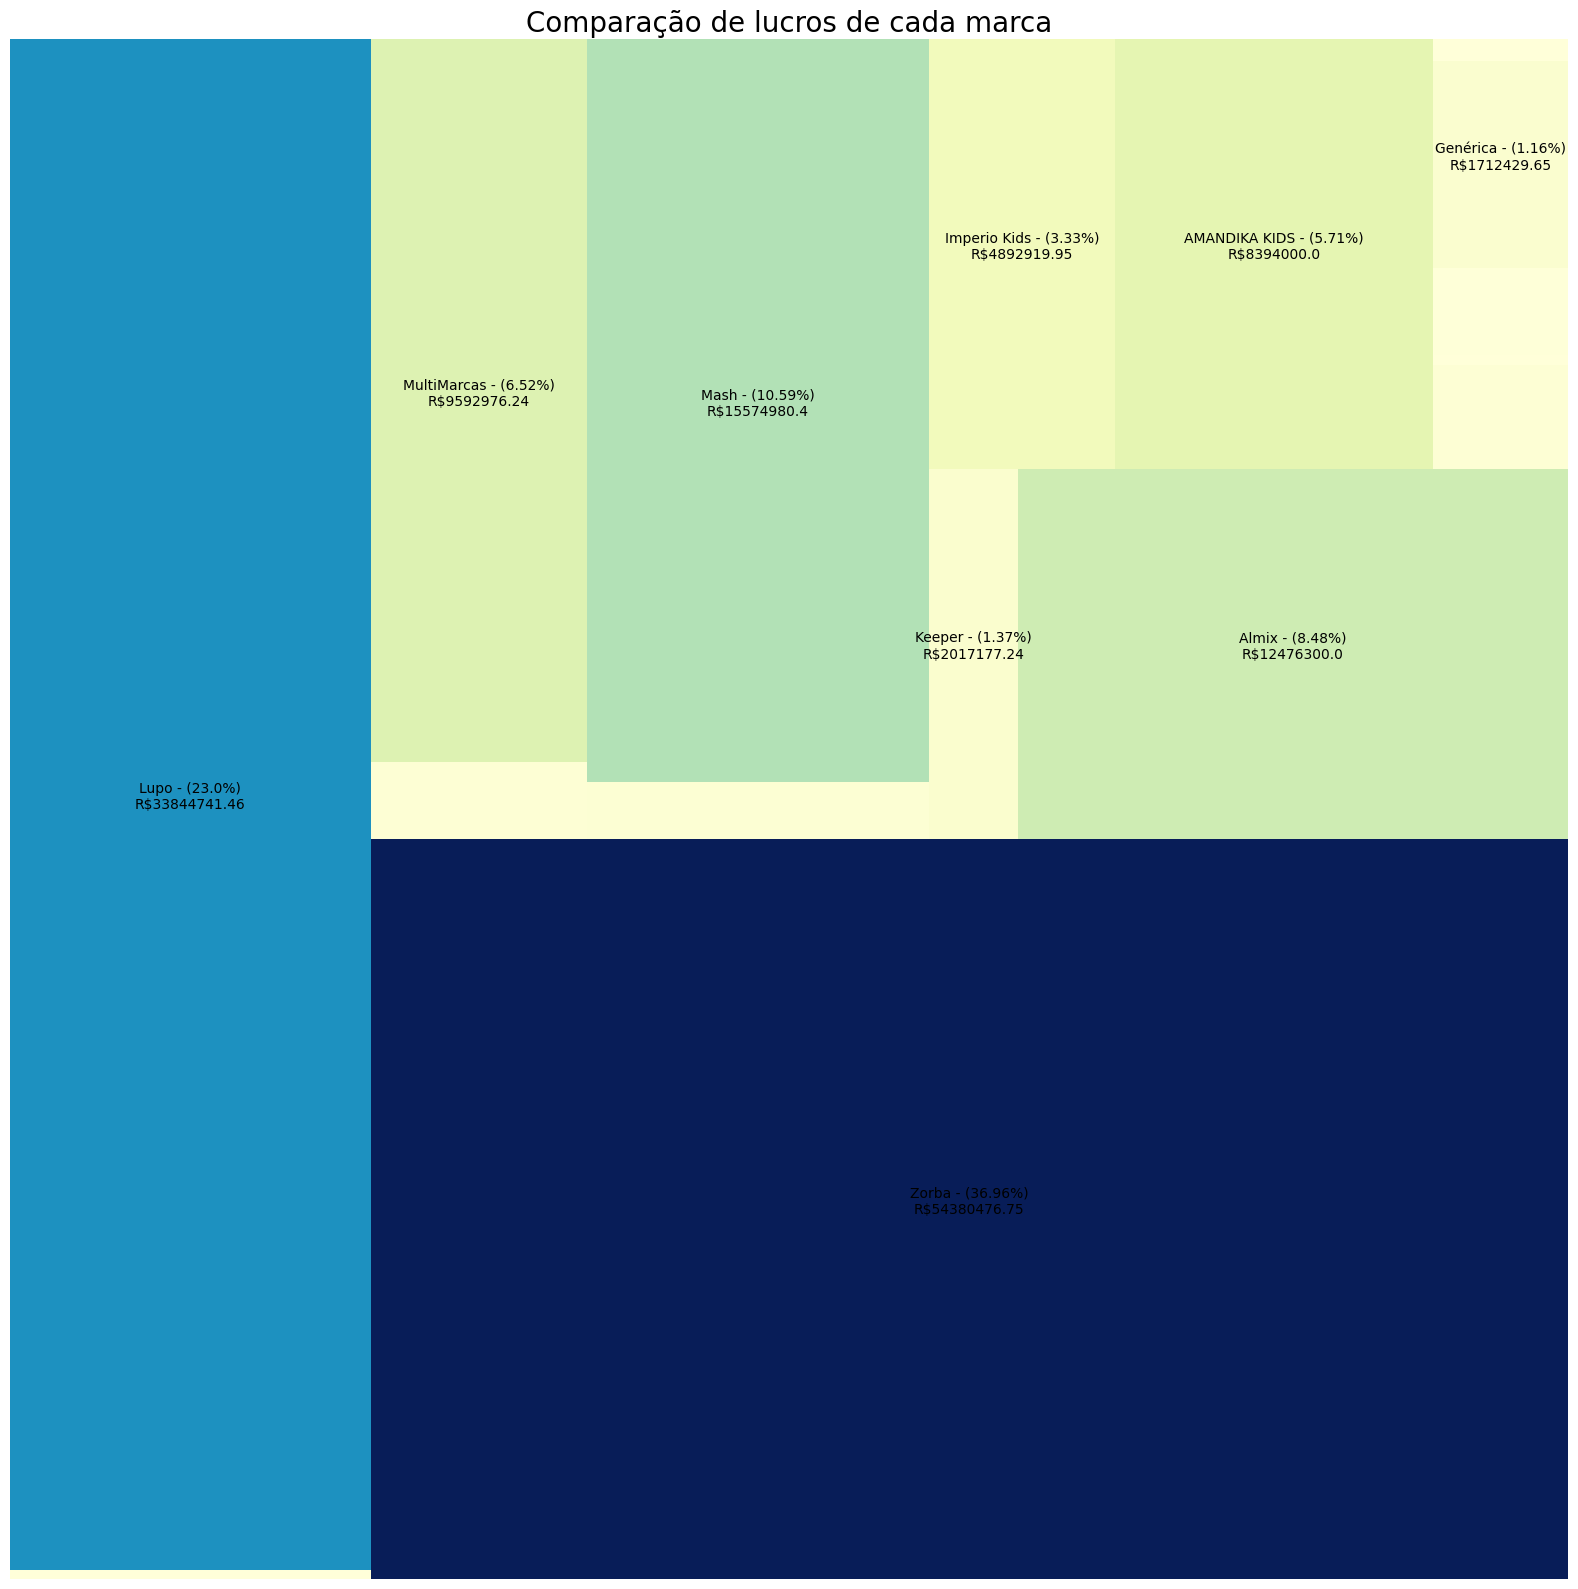

In [141]:
import matplotlib
import squarify

def monta_grafico_squarify(sizes, label, color, titulo:str) -> None:
    plt.figure(figsize=(16,16))
    grafico = squarify.plot(sizes=sizes,label=label,color=color)
    plt.axis('off');
    plt.title(titulo, fontsize=20)
    plt.tight_layout()

lista_vendas = [
    round(sum([
        (float(row[0].replace("R$ ", "")) * float(row[1]) ) for row in
        vendas_marcas_populares[marca].select("preco_com_desconto", "quantidade_vendida" ).collect()
    ]),2) for marca in vendas_marcas_populares
]
logger.debug(f"lista_vendas: {lista_vendas}")

lista_de_porcentagens = [
    round((item*100)/sum(lista_vendas),2) for item in
    lista_vendas
]
logger.debug(f"lista_de_porcentagens: {lista_de_porcentagens}")

legendas = [
    (
        marcas_populares[index]  + " - " + 
        "("+ str(lista_de_porcentagens[index]) + "%)\n" +
        "R$" + str(lista_vendas[index]) + "\n"
        if float(lista_de_porcentagens[index]) > 1 else ""
    ) for (index,item) in
    enumerate(marcas_populares)
]


cmap = matplotlib.cm.YlGnBu
colors = monta_lista_cores(cmap)

monta_grafico_squarify(sizes=lista_vendas, label=legendas, color=colors, titulo='Comparação de lucros de cada marca')

# COMPARAÇÃO DE PREÇOS DOS ARTIGOS MAIS BARATOS DE CADA LOJA

Pra fazer esse gráfico, o tamanho dos retânglos precisam ser porcentagens com relação ao preço mínimo da coluna de desconto
### GRÁFICO MONTADO DE FORMA QUE OS CAMPOS MAIS CLAROS REPRESENTAM OS PREÇOS MAIS ACESSÍVEIS, ENQUANTO OS ESCUROS REPRESENTAM OS MAIS CAROS

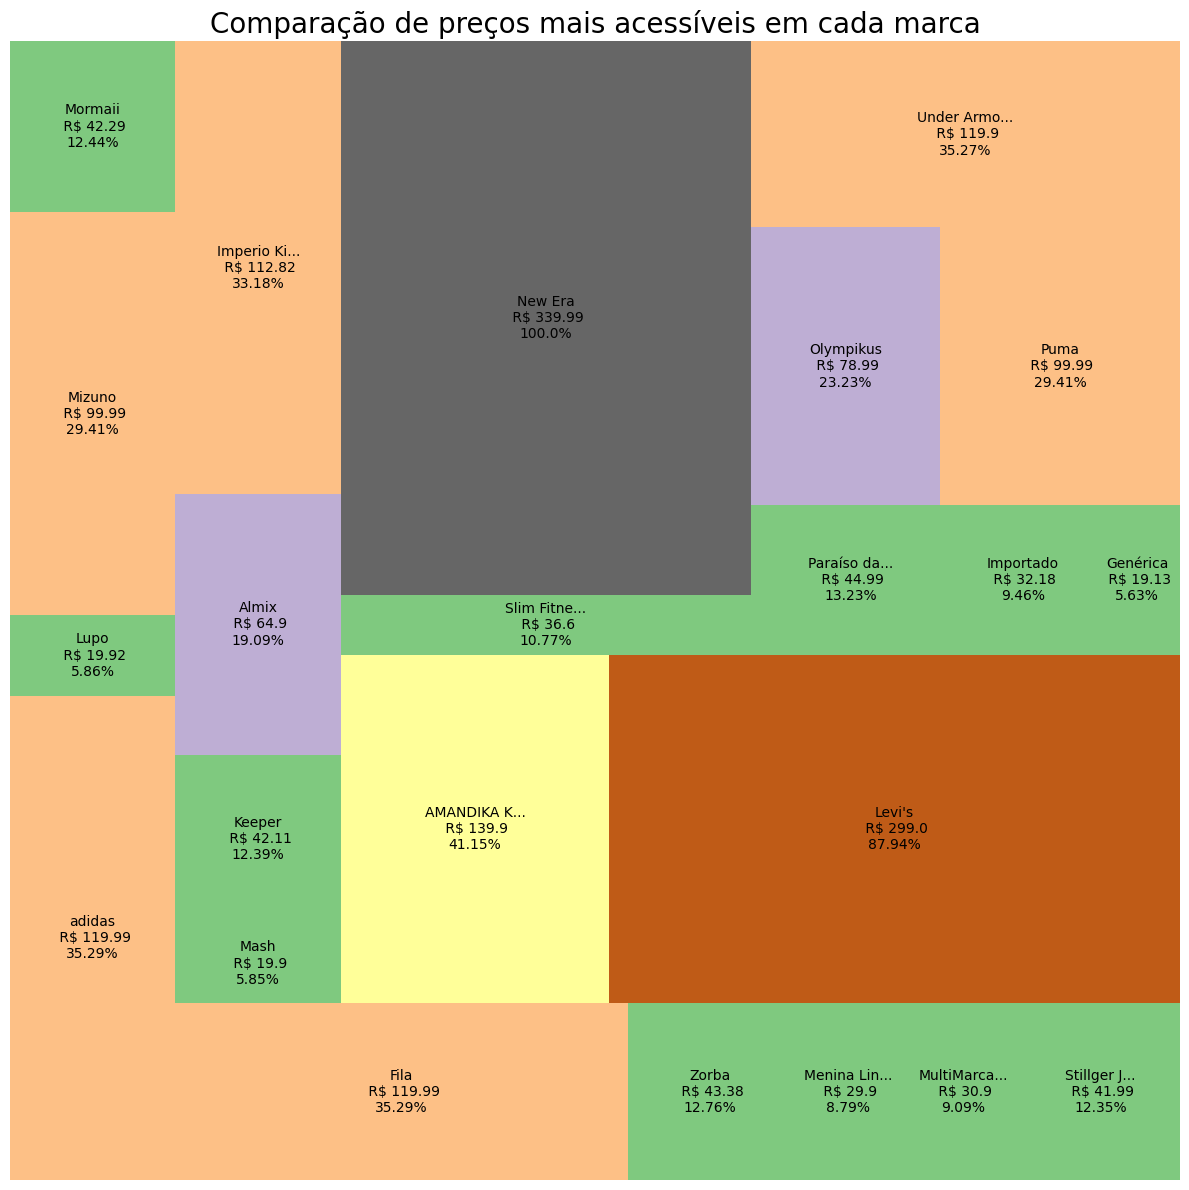

In [57]:
import matplotlib
import squarify

lista_precos = [
    min([
        float(row[0].replace("R$ ", "")) for row in
        vendas_marcas_populares[item].select("preco_com_desconto").collect()
    ]) for item in vendas_marcas_populares
]
logger.debug("Lista preços - grafico preços acessíveis por marca: " + str(lista_precos))
lista_de_porcentagens = [
    round((item*100)/max(lista_precos),2) for item in
    lista_precos
]
logger.debug("Lista preços - grafico preços acessíveis por marca: " + str(lista_precos))
legendas = [
    (marcas_populares[index][:10] + "...\n" if len(marcas_populares[index]) > 10 else marcas_populares[index] + "\n") +
    " R$ " + str(lista_precos[index])  + "\n" +
    str(lista_de_porcentagens[index]) + "%" for (index,item) in
    enumerate(marcas_populares)
]

cmap = matplotlib.cm.Accent
mini = min(lista_precos)
maxi = max(lista_precos)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in lista_precos]

plt.figure(figsize=(12, 12))
grafico = squarify.plot(sizes=lista_precos, label=legendas, color=colors)
plt.axis('off');
plt.title('Comparação de preços mais acessíveis em cada marca', fontsize=20)
plt.tight_layout()

# COMPARAÇÃO DE AVALIAÇÕES ENTRE MARCAS

Existem 5 marcas dentro da amostra escolhida que não possuem nenhuma avaliação. Por isso, foi necessário considerar o valor delas como zero no gráfico, por fins de comparação, porém na verdade seria interessante adquirir mais dados dessas marcas para melhores resultados

Text(0.5, 0, 'Média das avaliações do cliente')

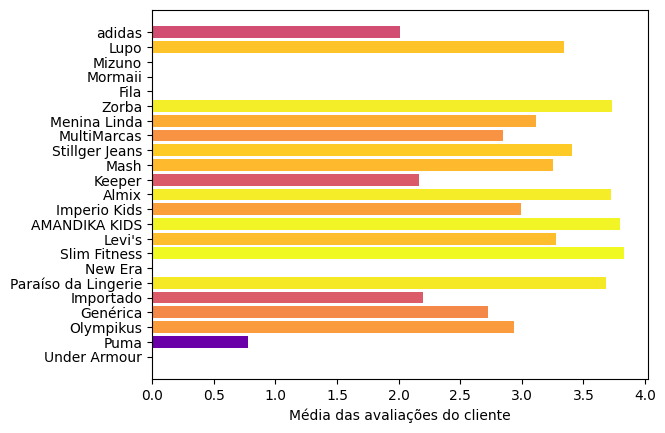

In [91]:
import matplotlib
import numpy as np

media_notas = [
    sum([
        (float(row[0]) if row[0] != "Sem avaliação" else 0) for row in
        vendas_marcas_populares[item].select("nota_satisfacao").collect()
    ])/len(vendas_marcas_populares[item].select("nota_satisfacao").collect())
    for item in vendas_marcas_populares
]
logger.debug("media das avaliações: " + str(media_notas))
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.plasma
mini = min(media_notas)
maxi = max(media_notas)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in media_notas]
fig, ax = plt.subplots()
y_pos = np.arange(len(marcas_populares))
ax.barh(y_pos, media_notas, color=colors)
ax.set_yticks(y_pos, marcas_populares)
ax.invert_yaxis()  # labels de cima pra baixo
ax.set_xlabel('Média das avaliações do cliente')


2023-10-10 03:22:03.031 | DEBUG    | __main__:<module>:21 - qtd em cada marca p/ categorias de moda: [790018.0, 34945.0, 44051.0, 0, 10120.0, 60570.0, 10.0]


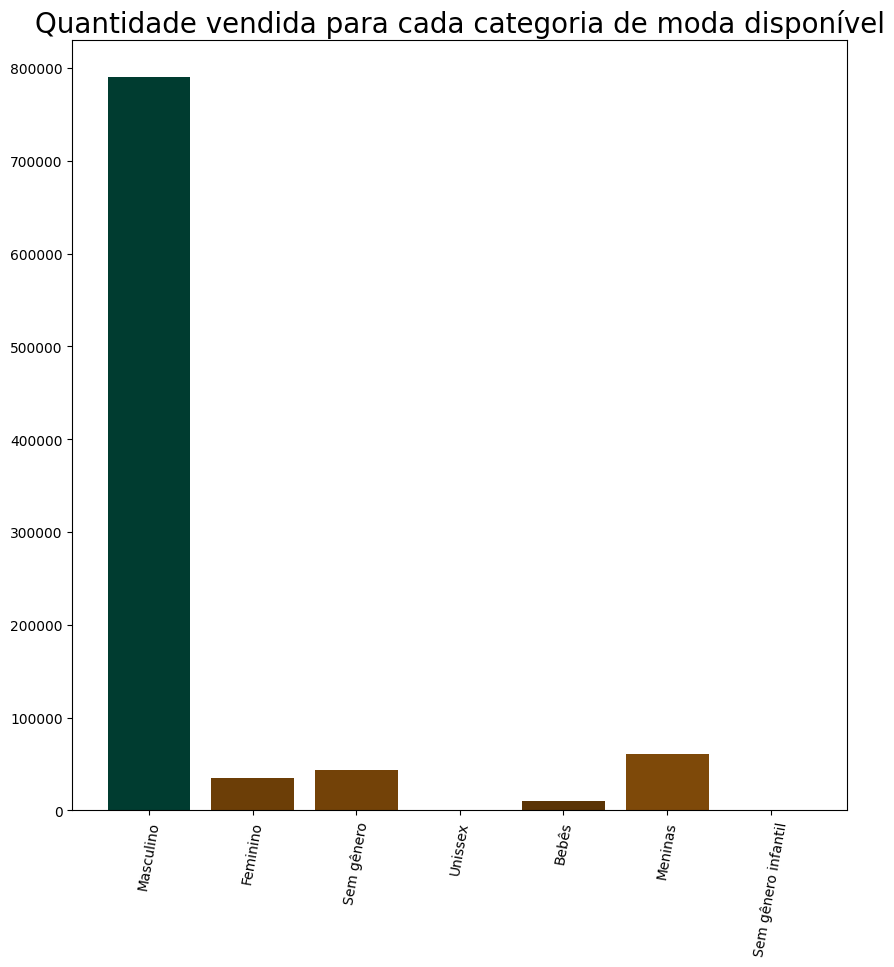

In [121]:
from typing import List

categorias_moda = [
    "Masculino",
    "Feminino",
    "Sem gênero",
    "Unissex",
    "Bebês",
    "Meninas",
    "Sem gênero infantil"
]

def soma_qtd_vendida_em_cada_marca_filtrando(categoria_moda:str)-> List[float]:
    return [sum([float(row[0]) for row in 
    vendas_marcas_populares[marca].select("quantidade_vendida").where(vendas_marcas_populares[marca].genero == categoria_moda).collect()]) for marca in
    marcas_populares]

quantidade_vendida_em_cada_marca =[
    round(sum(soma_qtd_vendida_em_cada_marca_filtrando(categoria)),2) for categoria in categorias_moda
]
logger.debug("qtd em cada marca p/ categorias de moda: " + str(quantidade_vendida_em_cada_marca) )
cmap = matplotlib.cm.BrBG
mini = min(quantidade_vendida_em_cada_marca)
maxi = max(quantidade_vendida_em_cada_marca)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in quantidade_vendida_em_cada_marca]

monta_grafico_barra(categorias_moda, quantidade_vendida_em_cada_marca, colors, "Quantidade vendida para cada categoria de moda disponível")

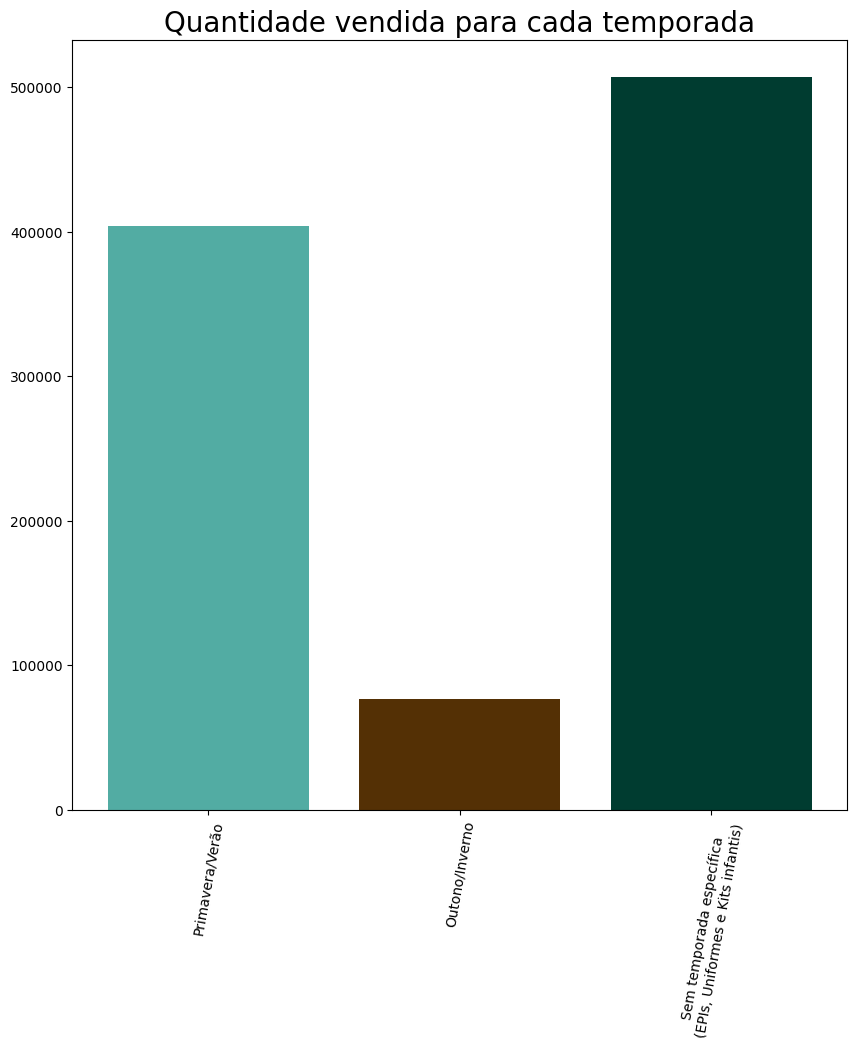

In [135]:
import matplotlib

def soma_qtd_vendida_em_cada_marca_filtrando(temporada:str)-> List[float]:
    return [sum([float(row[0]) for row in 
    vendas_marcas_populares[marca].select("quantidade_vendida").where(vendas_marcas_populares[marca].temporada == temporada).collect()]) for marca in
    marcas_populares]


temporadas = [
    "Primavera/Verão",
    "Outono/Inverno",
]
categorias_nao_especificas = [
    "N/A",
    "Primavera-verão Outono-inverno",
    "Primavera/Verão Outono/Inverno"
]
lista_cats_na = [
    round(sum(soma_qtd_vendida_em_cada_marca_filtrando(temporada)),2) for temporada in categorias_nao_especificas
]
lista_qtd_cada_marca = [
    round(sum(soma_qtd_vendida_em_cada_marca_filtrando(temporada)),2) for temporada in temporadas
]

# Com essa adição, agora ficam 3 categorias:
# "Primavera/Verão",
# "Outono/Inverno",
# "Sem temporada específica",
lista_qtd_cada_marca.append(sum(lista_cats_na))

temporadas.append("Sem temporada específica\n(EPIs, Uniformes e Kits infantis)")

cmap = matplotlib.cm.BrBG
mini = min(lista_qtd_cada_marca)
maxi = max(lista_qtd_cada_marca)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in lista_qtd_cada_marca]

monta_grafico_barra(temporadas, lista_qtd_cada_marca, colors, "Quantidade vendida para cada temporada")